In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('data/sac_find_best_relax.csv')
df.drop('name', axis=1, inplace=True)

# Matmul FLOP
flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['GFLOP/J'] = (flop / 1e9) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['GFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

df['energy'] -= df['runtime'] * 3.85

df

,pin,size,threads,runtime,runtimesd,energy,energysd,GFLOP/J,GFLOP/s,GFLOP/J SD
0,True,1000,1,0.015179,0.000251,0.179907,0.006634,8.386903,131.691201,0.0
1,True,1000,2,0.015457,0.000143,0.185636,0.008552,8.154369,129.327188,0.0
2,True,1000,3,0.010325,0.000095,0.161552,0.009263,9.930261,193.606998,0.0
3,True,1000,4,0.007733,0.000077,0.124910,0.009357,12.923218,258.495836,0.0
4,True,1000,5,0.006184,0.000060,0.120585,0.008922,13.844049,323.239967,0.0
5,True,1000,6,0.005165,0.000050,0.104667,0.009326,16.049560,387.046808,0.0
6,True,1000,7,0.004428,0.000042,0.104621,0.013507,16.430069,451.493271,0.0
7,True,1000,8,0.003872,0.000037,0.094538,0.009440,18.265101,516.334670,0.0
8,True,1000,9,0.003466,0.000036,0.096853,0.015174,18.140166,576.745528,0.0
9,True,1000,10,0.003101,0.000028,0.088678,0.010199,19.867578,644.661948,0.0


In [143]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=x, y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

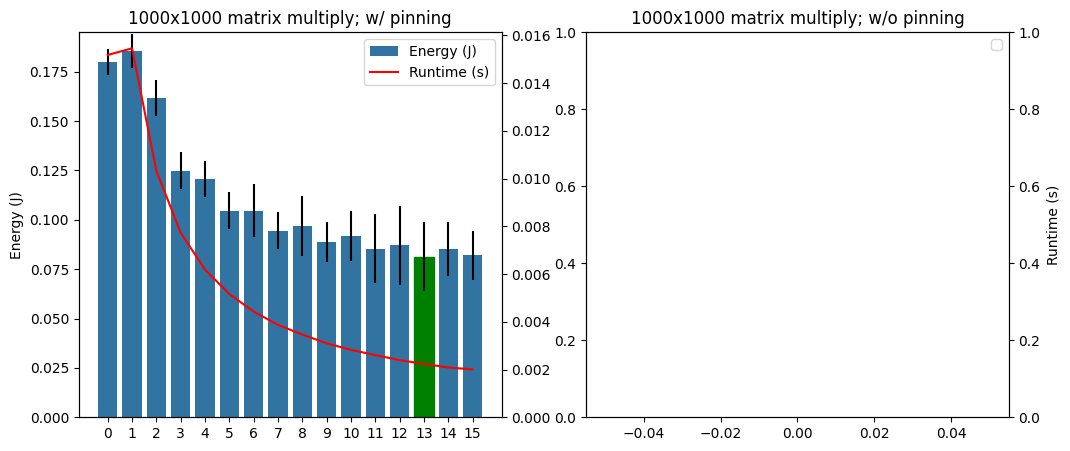

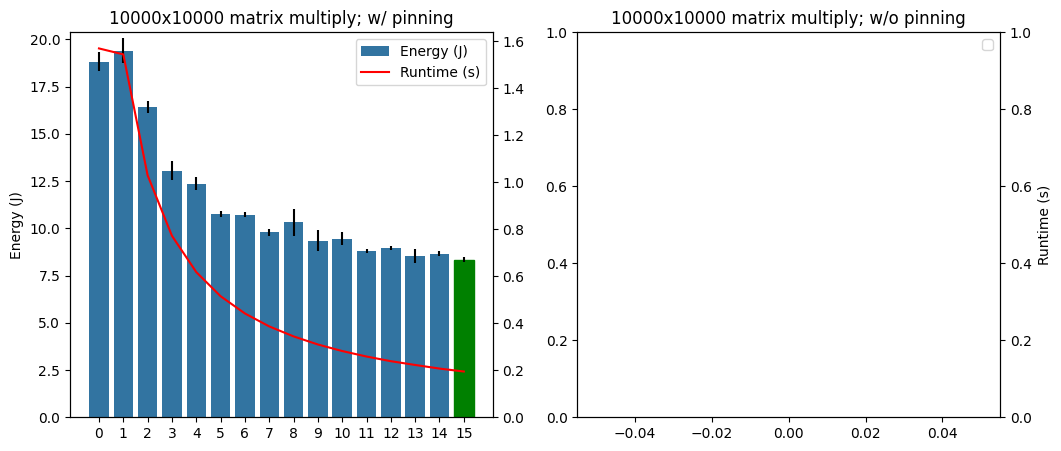

In [144]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()

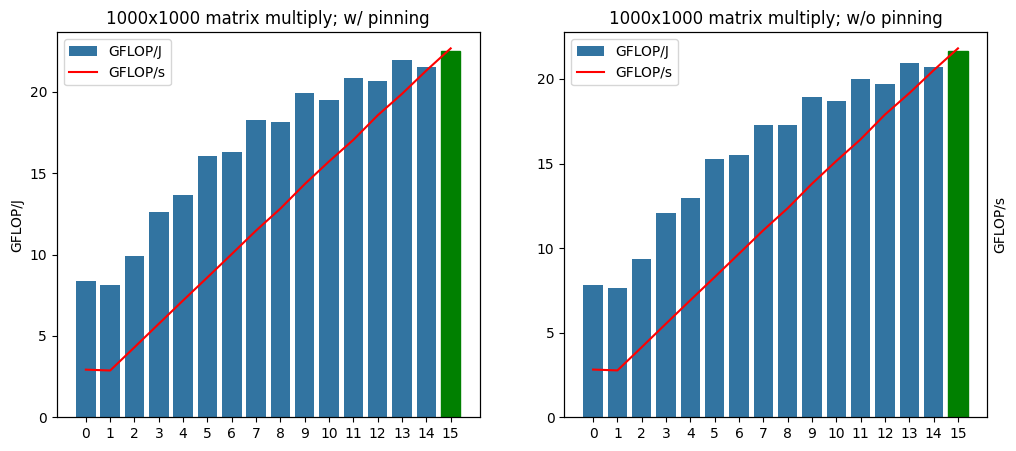

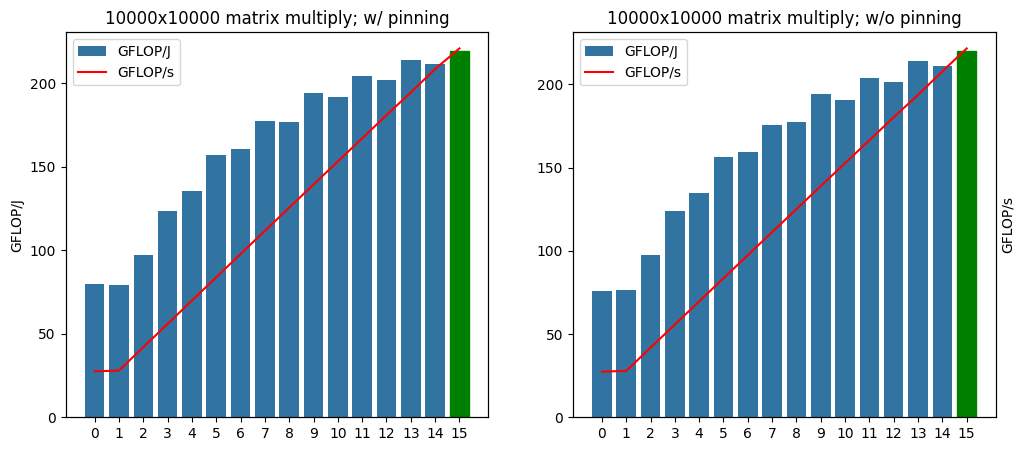

In [120]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()